# PROYECTO DATA SCIENCE ENGINEERING OF SCIENCE

### PREGUNTAS

- ¿Existe una correlación significativa entre la tasa de suicidios y el promedio de
ingresos a nivel nacional en diferentes países?, si es que existe ¿Cómo ha
evolucionado a lo largo de la última década?
- ¿Cómo han evolucionado las tasas de suicidios en diferentes países a lo largo de la
última década? (Países con mayor aumento y países con menor aumento)
- ¿Cómo influye la desigualdad de ingresos en la tasa de suicidios dentro de un país
en comparación con el nivel global?
- ¿Existe una relación entre la tasa de suicidios de un país por cada 100.000
habitantes y el nivel educativo de estos?
- ¿Cómo afecta la religión a la tasa de suicidios en diferentes países?
- ¿Cómo influye el acceso a la tecnología en la tasa de suicidios en diferentes grupos
demográficos?
- ¿Se relaciona la tasa de suicidios con la esperanza de vida de los países?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests 
from bs4 import BeautifulSoup as bs

IMPORTAMOS LAS LIBRERIAS QUE USAREMOS

In [3]:
#https://www.datosmundial.com/ingreso-promedio.php
ingresos_mundo= pd.read_csv('Datos/income.csv', sep=',')
ingresos_mundo.rename(columns={'LOCATION':'CodigoPais'}, inplace=True)
ingresos_mundo2009 = ingresos_mundo[ingresos_mundo["TIME"]==2009]
ingresos_mundo2019 = ingresos_mundo[ingresos_mundo["TIME"]==2019]
ingresos_mundo

,CodigoPais,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,AVWAGE,TOT,USD,A,2018,57843.000000,NaN
1,AUS,AVWAGE,TOT,USD,A,2019,58620.000000,NaN
2,AUS,AVWAGE,TOT,USD,A,2020,60377.000000,NaN
3,AUS,AVWAGE,TOT,USD,A,2021,60681.498547,NaN
4,AUS,AVWAGE,TOT,USD,A,2022,59407.889979,NaN
...,...,...,...,...,...,...,...,...
185,COL,AVWAGE,TOT,USD,A,2021,22248.491556,NaN
186,CRI,AVWAGE,TOT,USD,A,2018,27709.000000,NaN
187,CRI,AVWAGE,TOT,USD,A,2019,28524.000000,NaN
188,CRI,AVWAGE,TOT,USD,A,2020,31341.000000,NaN


CREAMOS UN DATAFRAME CON LOS INGRESOS MEDIOS DE CADA PAIS EN AMBOS AÑOS A COMPARAR

In [4]:
df_suicidio_oms= pd.read_excel('Datos/data.xlsx',skiprows=2)
pd.set_option('display.max_columns', None)
df_suicidio_oms.dropna(thresh=0.2, inplace=True)


In [5]:
df_suicidio_oms_clean=df_suicidio_oms[['ParentLocation','SpatialDimValueCode','Location','Period','Dim1','FactValueNumeric']]
#renomvramos la columna spatialdimvaluecode por codigo pais
df_suicidio_oms_clean.rename(columns={'SpatialDimValueCode':'CodigoPais'}, inplace=True)    


C:\Users\Asus\AppData\Local\Temp\ipykernel_5564\3976077051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suicidio_oms_clean.rename(columns={'SpatialDimValueCode':'CodigoPais'}, inplace=True)


In [6]:
suicidios2009 = df_suicidio_oms_clean[df_suicidio_oms_clean['Period'] == 2009]
suicidios2009 = suicidios2009[suicidios2009['Dim1'] == "Both sexes"]

In [7]:
suicidios2019 = df_suicidio_oms_clean[df_suicidio_oms_clean['Period'] == 2019]
suicidios2019 = suicidios2019[suicidios2019['Dim1'] == "Both sexes"]


  ## 1. ¿Existe una correlación significativa entre la tasa de suicidios y el promedio de ingresos a nivel nacional en diferentes países?, si es que existe ¿Cómo ha evolucionado a lo largo de la última década? (Martín)

In [8]:
#haremos un merge de los datos de suicidios con los datos de ingresos
suicidios_ingresos2009 = suicidios2009.merge(ingresos_mundo2009, on="CodigoPais", how="left")
suicidios_ingresos2019 = suicidios2019.merge(ingresos_mundo2019, on="CodigoPais")
suicidios_ingresos2009.head(15)

,ParentLocation,CodigoPais,Location,Period,Dim1,FactValueNumeric,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,Africa,AGO,Angola,2009,Both sexes,6.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,BDI,Burundi,2009,Both sexes,7.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,BEN,Benin,2009,Both sexes,8.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,BFA,Burkina Faso,2009,Both sexes,7.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,BWA,Botswana,2009,Both sexes,25.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Africa,CAF,Central African Republic,2009,Both sexes,15.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Africa,CIV,Côte d’Ivoire,2009,Both sexes,10.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa,CMR,Cameroon,2009,Both sexes,11.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Africa,COD,Democratic Republic of the Congo,2009,Both sexes,7.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Africa,COG,Congo,2009,Both sexes,9.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
suicidios_ingresos2019.head(15)

,ParentLocation,CodigoPais,Location,Period,Dim1,FactValueNumeric,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,Americas,CAN,Canada,2019,Both sexes,11.81,AVWAGE,TOT,USD,A,2019,56370.0,NaN
1,Americas,CHL,Chile,2019,Both sexes,8.97,AVWAGE,TOT,USD,A,2019,33190.0,NaN
2,Americas,COL,Colombia,2019,Both sexes,3.90,AVWAGE,TOT,USD,A,2019,21751.0,NaN
3,Americas,CRI,Costa Rica,2019,Both sexes,8.06,AVWAGE,TOT,USD,A,2019,28524.0,NaN
4,Americas,MEX,Mexico,2019,Both sexes,5.31,AVWAGE,TOT,USD,A,2019,18031.0,NaN
5,Americas,USA,United States of America,2019,Both sexes,16.14,AVWAGE,TOT,USD,A,2019,73194.0,NaN
6,Europe,AUT,Austria,2019,Both sexes,14.60,AVWAGE,TOT,USD,A,2019,64623.0,NaN
7,Europe,BEL,Belgium,2019,Both sexes,18.29,AVWAGE,TOT,USD,A,2019,65700.0,NaN
8,Europe,CHE,Switzerland,2019,Both sexes,14.54,AVWAGE,TOT,USD,A,2019,71189.0,NaN
9,Europe,CZE,Czechia,2019,Both sexes,12.18,AVWAGE,TOT,USD,A,2019,36071.0,NaN


## 2. ¿Cómo han evolucionado las tasas de suicidios en diferentes países a lo largo de la última década? (Países con mayor aumento y países con menor aumento) (Josías)

## 3. ¿Cómo influye la desigualdad de ingresos en la tasa de suicidios dentro de un país en comparación con el nivel global? (Akira)

# 4. ¿Existe una relación entre la tasa de suicidios de un país por cada 100.000 habitantes y el nivel educativo de estos? (Mati)

# 5. ¿Cómo afecta la religión a la tasa de suicidios en diferentes países? (Guilad)

In [10]:
url_porcentaje_creyentes = "https://countryeconomy.com/demography/religions"
page = requests.get(url_porcentaje_creyentes).text
soup = bs(page)
tables = soup.find_all('table')

df_porcentaje_creyentes = pd.DataFrame(columns=["Countries","Religious"])

#Solo hay 1 tabla en la pagina, por lo que solo se toma la primera
for row in tables[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        country = col[0].text.strip()
        religion = col[1].text.strip()
        new_row = pd.DataFrame({"Countries":[country],"Religious":[religion]})
        df_porcentaje_creyentes = pd.concat([df_porcentaje_creyentes, new_row], ignore_index=True)
    
#Limpiar la columna countries
df_porcentaje_creyentes["Countries"] = df_porcentaje_creyentes["Countries"].str.split("[").str[0]
df_porcentaje_creyentes["Countries"] = df_porcentaje_creyentes["Countries"].str.strip()
#Dejar la columna religious con valor numerico
df_porcentaje_creyentes["Religious"] = df_porcentaje_creyentes["Religious"].str.replace("%","")
df_porcentaje_creyentes["Religious"] = df_porcentaje_creyentes["Religious"].astype(float)
df_porcentaje_creyentes.rename(columns={"Countries":"Location"}, inplace=True)
df_porcentaje_creyentes.rename(columns={"Religious":"Religious %"}, inplace=True)
df_porcentaje_creyentes

,Location,Religious %
0,United States,81.00
1,United Kingdom,73.84
2,Germany,77.00
3,France,80.85
4,Japan,90.50
...,...,...
188,Samoa,98.54
189,Yemen,100.00
190,South Africa,93.60
191,Zambia,99.82


In [11]:
url_population = "https://en.wikipedia.org/wiki/List_of_countries_by_population_in_2010"
page = requests.get(url_population).text
soup = bs(page)
tables = soup.find_all('table')

df_population = pd.DataFrame(columns=["Location","Population"])

#Usaremos la 2da tabla de la pagina
for row in tables[1].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        country = col[1].text.strip()
        population = col[2].text.strip()
        new_row = pd.DataFrame({"Location":[country],"Population":[population]})
        df_population = pd.concat([df_population, new_row], ignore_index=True)

df_population



,Location,Population
0,World,"6,843,522,711"
1,China,"1,339,724,852"
2,India,"1,182,105,564"
3,United States,"309,349,689"
4,Indonesia,"237,641,326"
...,...,...
194,U.S. Virgin Islands,"106,267"
195,Tonga,"103,365"
196,Micronesia,"102,624"
197,Aruba,"101,484"


In [48]:
df_porcentaje_religion = pd.read_excel('Datos/Religious_Composition_by_Country_2010-2050.xlsx',)
df_porcentaje_religion = df_porcentaje_religion[df_porcentaje_religion["Year"]==2010]
suicidios_2010 = df_suicidio_oms_clean[df_suicidio_oms_clean['Period'] == 2010]
suicidios_2010 = suicidios_2010[suicidios_2010['Dim1'] == "Both sexes"]
# Hacer merge de ambos dataframe segun Country(en df_suicidios) y Location(en df_porcentaje_religion)
suicidios_religion_2010 = suicidios_2010.merge(df_porcentaje_religion, left_on="Location", right_on="Country", how="left")
#Eliminar columnas innecesarias (row_number,level,Nation_fk,Year,Region,Country)
suicidios_religion_2010.drop(columns=['row_number','level','Nation_fk','Year','Region','Country','Unaffiliated',"All Religions","Dim1","Period","CodigoPais"], inplace=True)
suicidios_religion_2010.dropna(inplace=True)
#Hacemos merge con el dataframe de poblacion
suicidios_religion_2010 = suicidios_religion_2010.merge(df_population, on="Location", how="left")
#hacemos merge con el dataframe de porcentaje de creyentes
suicidios_religion_2010 = suicidios_religion_2010.merge(df_porcentaje_creyentes, on="Location", how="left")
#Arreglamos columnas
suicidios_religion_2010.rename(columns={"FactValueNumeric":"Suicides per 100K"}, inplace=True)
suicidios_religion_2010['Population'] = pd.to_numeric(suicidios_religion_2010['Population'].replace(',', '', regex=True), errors='coerce')
#Mostrar dataframe con random de 10 filas
suicidios_religion_2010.sample(15)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ParentLocation,Location,Suicides per 100K,Christians,Muslims,Hindus,Buddhists,Folk Religions,Other Religions,Jews,Population,Religious %
134,South-East Asia,Indonesia,2.64,"23,660,000","209,120,000","4,050,000","1,720,000","750,000","340,000","<10,000",237641326.0,99.25
115,Europe,Luxembourg,12.01,"360,000","10,000","<10,000","<10,000","<10,000","<10,000","<10,000",502066.0,95.04
5,Africa,Central African Republic,15.75,"3,940,000","370,000","<10,000","<10,000","40,000","<10,000","<10,000",4505945.0,98.76
87,Eastern Mediterranean,Tunisia,3.47,"20,000","10,430,000","<10,000","<10,000","<10,000","<10,000","<10,000",10547100.0,100.00
107,Europe,Hungary,25.52,"8,090,000","<10,000","<10,000","<10,000","<10,000","<10,000","10,000",10014324.0,72.84
94,Europe,Bulgaria,12.35,"6,150,000","1,020,000","<10,000","<10,000","<10,000","<10,000","<10,000",7563710.0,95.27
143,Western Pacific,Fiji,9.64,"550,000","50,000","240,000","<10,000","<10,000","<10,000","<10,000",850700.0,98.95
105,Europe,Greece,3.48,"10,010,000","610,000","20,000","<10,000","10,000","<10,000","<10,000",11305118.0,97.39
65,Americas,Paraguay,3.53,"6,250,000","<10,000","<10,000","<10,000","110,000","10,000","<10,000",6459727.0,97.00
0,Africa,Angola,6.97,"17,270,000","40,000","<10,000","<10,000","790,000","<10,000","<10,000",18992708.0,98.21


#### Paises mas religiosos vs menos religiosos

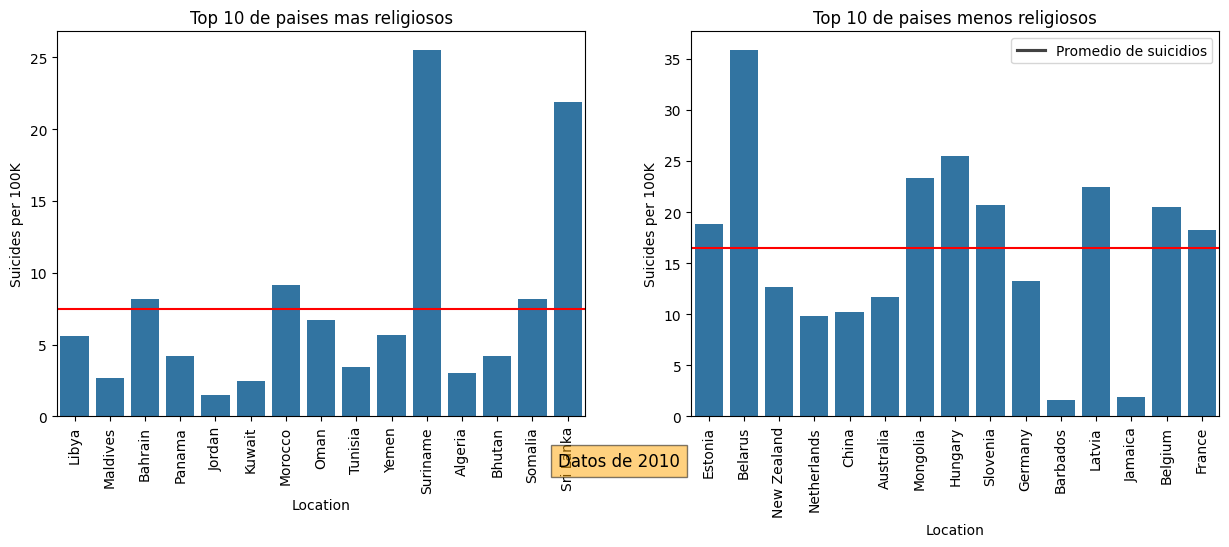

In [58]:
#Seleccionamos top 10 de paises mas religiosos
top_10_religiosos = suicidios_religion_2010.sort_values(by="Religious %", ascending=False).head(15)
#Seleccionamos top 10 de paises menos religiosos
top_10_no_religiosos = suicidios_religion_2010.sort_values(by="Religious %", ascending=True).head(15)
#Sacamos el promedio de suicidios por cada 100mil habitantes de ambos grupos
promedio_religiosos = top_10_religiosos["Suicides per 100K"].mean()
promedio_no_religiosos = top_10_no_religiosos["Suicides per 100K"].mean()

#Los comparamos en un grafico de barras
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Top 10 de paises mas religiosos")
sns.barplot(data=top_10_religiosos, x="Location", y="Suicides per 100K")
plt.xticks(rotation=90)
plt.axhline(promedio_religiosos, color="red")
plt.subplot(1,2,2)
plt.title("Top 10 de paises menos religiosos")
sns.barplot(data=top_10_no_religiosos, x="Location", y="Suicides per 100K")
plt.xticks(rotation=90)
plt.axhline(promedio_no_religiosos, color="red")
plt.legend(labels=["Promedio de suicidios"])
#Agregamos una descripcion que aclare que son datos de 2010
plt.figtext(0.5, 0.01, "Datos de 2010", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()



>
> #### Los paises menos religiosos tienen mayor promedio en su tasa de suicidios respecto a los mas religiosos
>

#### Hay alguna religion que tienda a tener mas suicidios que otras?

In [91]:
#Ordenamos el dataframe por religion. Es decir en cada row, veremos cual es la religion predominante (Mayor numero respecto a la poblacion total)
#Para ello, agregaremos una columna('predominant') con la religion predominante por pais, siendo las opciones: Christians,Muslims,Hindus,Buddhists,Folk Religions,Other Religions, Jews 
religion_columns = ['Christians', 'Muslims', 'Hindus', 'Buddhists', 'Folk Religions', 'Other Religions', 'Jews']
religions_df = suicidios_religion_2010.copy()
for col in religion_columns:
    # Convertimos a numeros
    religions_df[col] = religions_df[col].replace('<', '', regex=True).replace(',', '', regex=True)
    religions_df[col] = pd.to_numeric(religions_df[col], errors='coerce')
religions_df['Predominant Religion'] = religions_df[religion_columns].idxmax(axis=1)
#Eliminamos todas las columnas que no sean necesarias: Christians,Musilms...etc
for religion in religion_columns:
    religions_df.drop(columns=[religion], inplace=True)

#Creamos un dataframe agrupado por 'Predominant Religion' y calculamos el promedio de suicidios 'Suicides per 100K'
grouped_df = religions_df.groupby('Predominant Religion').agg({'Population': 'sum', 'Suicides per 100K': 'mean'})

grouped_df = grouped_df.reset_index()
#Ajustamos el numero sucidies per 100k para que sea mas legible
grouped_df['Suicides per 100K'] = grouped_df['Suicides per 100K'].round(2)


In [92]:
#Creamos la columna 'Suicides per population' que es se calcula: (population * suicides per 100k) / 100000
grouped_df['Suicides per population'] = (grouped_df['Population'] * grouped_df['Suicides per 100K']) / 100000
grouped_df['Suicides per population'] = grouped_df['Suicides per population'].round(2)
grouped_df

,Predominant Religion,Population,Suicides per 100K,Suicides per population
0,Buddhists,2.354434e+08,13.85,32608.91
1,Christians,1.855450e+09,12.02,223025.07
2,Folk Religions,1.339725e+09,10.24,137187.82
3,Hindus,1.211433e+09,10.36,125504.43
4,Jews,7.623600e+06,6.66,507.73
5,Muslims,1.108498e+09,6.38,70722.16


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


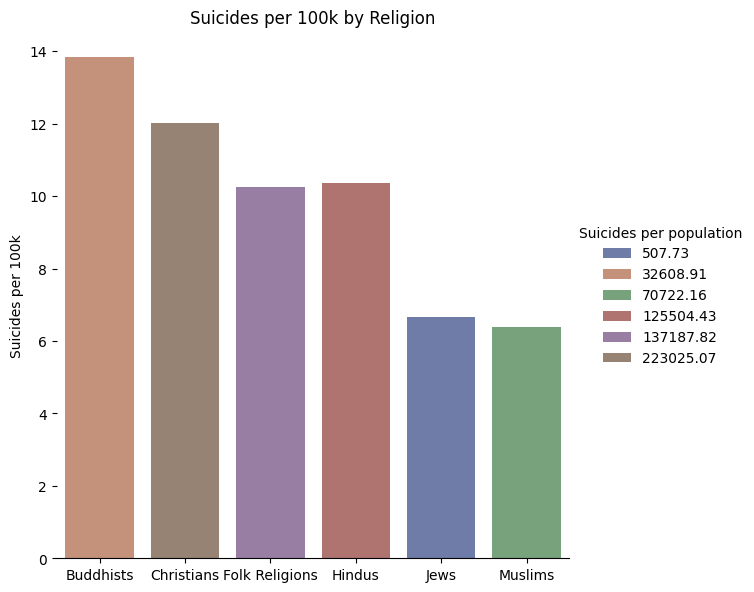

In [94]:
g = sns.catplot(
    data=grouped_df, kind="bar",
    x="Predominant Religion", y="Suicides per 100K", hue="Suicides per population",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Suicides per 100k")
g.legend.set_title("Suicides per population")
plt.title("Suicides per 100k by Religion")
plt.show()


> Podemos ver que los Budistas tienen una tasa de suicidios mas alta que el resto de las religiones cada 100.000 habitantes, seguido de los cristianos
> Si tomamos en cuenta la cantidad de personas que pertenecen a cada religion, podemos ver que los cristianos tienen una tasa de suicidios mas alta que el resto de las religiones, esto se debe a que hay muchas mnas personas que pertenecen a esta religion(1.855450e+09) en el mundo.
> Pero podemos ver un contraejemplo (de 2010) con los [1500 millones](https://www.institutohalal.com/la-poblacion-musulmana-en-el-mundo/#:~:text=Una%20poblaci%C3%B3n%20en%20aumento%3A%20De,a%202200%20millones%20en%202030) de musulmanes con una tasa de suicdios de 6.5 cada 100.000 habitantes, que es menor a la de los [1.100 millones](https://elpais.com/internacional/2013/03/13/actualidad/1363206070_914018.html#:~:text=En%201910%2C%20los%20cat%C3%B3licos%20eran,cat%C3%B3lica%20global%20del%20Pew%20Center.) Cristianos en el mundo, con una tasa de 12 cada 100.000 habitantes.
> Es decir en 2010, los musulmanes tenian una tasa de suicidios 50% menor a la de los cristianos. **Por lo que podemos afirmar que hay religiones que tienden a tener mas suicidios que otras.**

# 6. ¿Cómo influye el acceso a la tecnología en la tasa de suicidios en diferentes grupos demográficos?

# 7. ¿Se relaciona la tasa de suicidios con la esperanza de vida de los países?